<a href="https://colab.research.google.com/github/chintan1529/-Diabetic-Retinopathy-Detection/blob/main/NNMLPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=1000):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale and reshapes them for PCA.
    """
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = np.array(data['image'].convert('L'))  # Convert to grayscale
        images.append(img.flatten())  # Flatten the image
        labels.append(data['label'])
    return np.array(images), np.array(labels)

# Load and preprocess dataset
num_samples = 1000  # Adjust based on memory limits
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")


Loaded 1000 samples with 65536 features each.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=500, image_size=(128, 128)):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale, resizes them, and processes in batches.
    """
    from PIL import Image
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = data['image'].convert('L').resize(image_size)  # Convert to grayscale & resize
        images.append(np.array(img, dtype=np.float32).flatten())  # Flatten the image
        labels.append(data['label'])
    return np.array(images, dtype=np.float32), np.array(labels)

# Load and preprocess dataset
num_samples = 500  # Adjust based on memory limits
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")

# Optimized PCA using SVD
def pca_svd(X, num_components):
    """
    Perform Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to avoid memory issues.
    """
    # Step 1: Compute the mean and center the data
    mean_X = np.mean(X, axis=0, dtype=np.float32)
    X_centered = X - mean_X

    # Step 2: Compute SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Select top principal components
    selected_components = Vt[:num_components]

    # Step 4: Transform data to lower-dimensional space
    X_reduced = np.dot(X_centered, selected_components.T)

    return X_reduced, S

# Reduce to 50 principal components
num_components = 50
X_pca, explained_variance = pca_svd(X, num_components)

print(f"Reduced dataset shape: {X_pca.shape}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loaded 500 samples with 16384 features each.
Reduced dataset shape: (500, 50)


Loaded 500 samples with 16384 features each.
Reduced dataset shape: (500, 50)
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4958
Epoch 200: Loss = 0.3733
Epoch 300: Loss = 0.2937
Epoch 400: Loss = 0.2394
Epoch 500: Loss = 0.2006
Epoch 600: Loss = 0.1719
Epoch 700: Loss = 0.1499
Epoch 800: Loss = 0.1326
Epoch 900: Loss = 0.1187
Accuracy: 1.0000


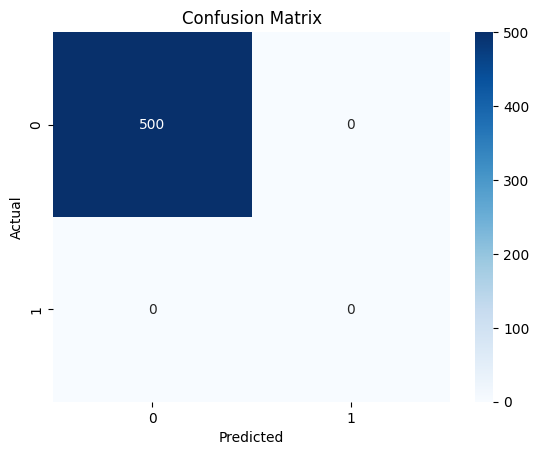

In [4]:
!pip install datasets
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=500, image_size=(128, 128)):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale, resizes them, and processes in batches.
    """
    from PIL import Image
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = data['image'].convert('L').resize(image_size)  # Convert to grayscale & resize
        images.append(np.array(img, dtype=np.float32).flatten())  # Flatten the image
        labels.append(data['label'])
    return np.array(images, dtype=np.float32), np.array(labels)

# Load and preprocess dataset
num_samples = 500  # Adjust based on memory limits
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")

# Optimized PCA using SVD
def pca_svd(X, num_components):
    """
    Perform Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to avoid memory issues.
    """
    # Step 1: Compute the mean and center the data
    mean_X = np.mean(X, axis=0, dtype=np.float32)
    X_centered = X - mean_X

    # Step 2: Compute SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Select top principal components
    selected_components = Vt[:num_components]

    # Step 4: Transform data to lower-dimensional space
    X_reduced = np.dot(X_centered, selected_components.T)

    return X_reduced, S

# Reduce to 50 principal components
num_components = 50
X_pca, explained_variance = pca_svd(X, num_components)

print(f"Reduced dataset shape: {X_pca.shape}")

# Implementing Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    """Train a logistic regression model from scratch."""
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias

def predict(X, weights, bias):
    """Make predictions using the trained logistic regression model."""
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Train the logistic regression model
# Convert y to numerical labels before training
y_numeric = np.where(y == 'Healthy', 0, 1)  # Assuming 'Healthy' is 0 and other labels are 1
weights, bias = train_logistic_regression(X_pca, y_numeric, lr=0.01, epochs=1000)

# Predict on training data
y_pred = predict(X_pca, weights, bias)

# Evaluate performance
# Convert y_pred back to original labels for evaluation
y_pred_labels = np.where(np.array(y_pred) == 0, 'Healthy', 'Diabetic_Retinopathy')
accuracy = np.mean(y_pred_labels == y)  # Compare with original string labels
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
# Use original string labels for confusion matrix
conf_matrix = np.zeros((2, 2), dtype=int)
for true, pred in zip(y, y_pred_labels):
    true_idx = 0 if true == 'Healthy' else 1
    pred_idx = 0 if pred == 'Healthy' else 1
    conf_matrix[true_idx][pred_idx] += 1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Loaded 500 samples with 16384 features each.
Reduced dataset shape: (400, 50)


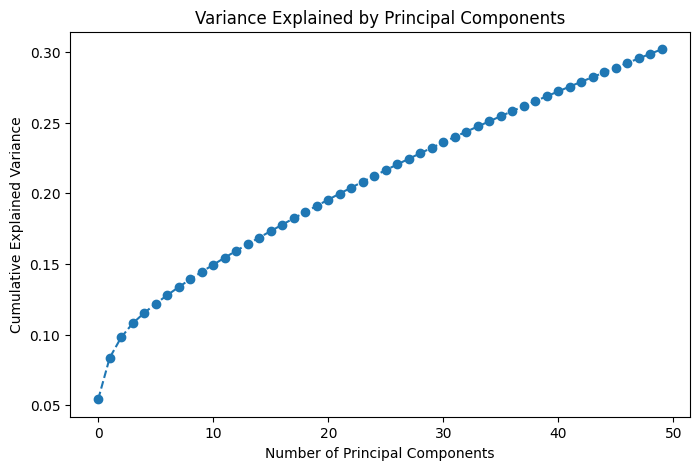

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4958
Epoch 200: Loss = 0.3733
Epoch 300: Loss = 0.2937
Epoch 400: Loss = 0.2394
Epoch 500: Loss = 0.2006
Epoch 600: Loss = 0.1719
Epoch 700: Loss = 0.1499
Epoch 800: Loss = 0.1326
Epoch 900: Loss = 0.1187
Training Accuracy: 1.0000
Testing Accuracy: 1.0000


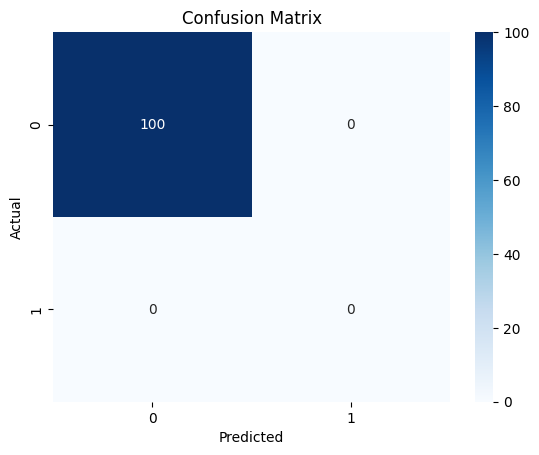

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=500, image_size=(128, 128)):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale, resizes them, and processes in batches.
    """
    from PIL import Image
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = data['image'].convert('L').resize(image_size)  # Convert to grayscale & resize
        images.append(np.array(img, dtype=np.float32).flatten())  # Flatten the image
        labels.append(1 if data['label'] != 'Healthy' else 0)  # Convert labels to 0 and 1
    return np.array(images, dtype=np.float32), np.array(labels)

# Load and preprocess dataset
num_samples = 500  # Adjust based on memory limits
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized PCA using SVD
def pca_svd(X, num_components):
    """
    Perform Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to avoid memory issues.
    """
    # Step 1: Compute the mean and center the data
    mean_X = np.mean(X, axis=0, dtype=np.float32)
    X_centered = X - mean_X

    # Step 2: Compute SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Select top principal components
    selected_components = Vt[:num_components]

    # Step 4: Transform data to lower-dimensional space
    X_reduced = np.dot(X_centered, selected_components.T)

    return X_reduced, S

# Reduce to 50 principal components
num_components = 50
X_train_pca, explained_variance_train = pca_svd(X_train, num_components)
X_test_pca, explained_variance_test = pca_svd(X_test, num_components)

print(f"Reduced dataset shape: {X_train_pca.shape}")

# Plot variance explained
explained_variance_ratio = explained_variance_train[:num_components] / np.sum(explained_variance_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by Principal Components")
plt.show()

# Implementing Logistic Regression from Scratch with L2 Regularization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, epochs=1000, lambda_reg=0.1):
    """Train a logistic regression model from scratch with L2 regularization."""
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients with L2 regularization
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (lambda_reg / m) * weights
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias

def predict(X, weights, bias):
    """Make predictions using the trained logistic regression model."""
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Train the logistic regression model
weights, bias = train_logistic_regression(X_train_pca, y_train, lr=0.01, epochs=1000, lambda_reg=0.1)

# Predict on training and testing data
y_train_pred = predict(X_train_pca, weights, bias)
y_test_pred = predict(X_test_pca, weights, bias)

# Evaluate performance
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = np.zeros((2, 2), dtype=int)
for true, pred in zip(y_test, y_test_pred):
    conf_matrix[int(true)][int(pred)] += 1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Loaded 2000 samples with 16384 features each.
Reduced dataset shape: (1600, 50)


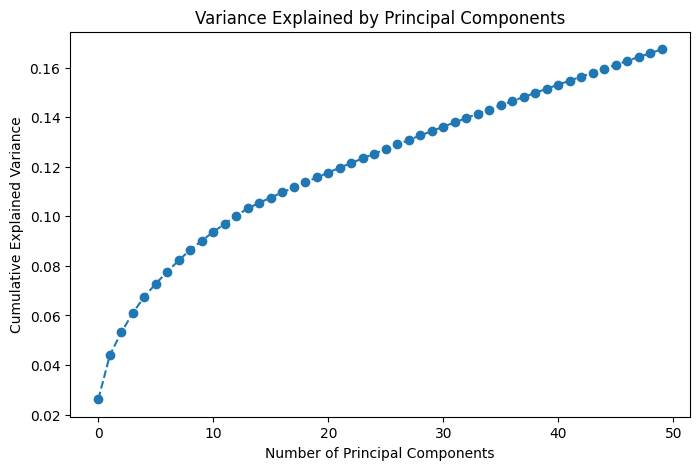

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3677
Epoch 200: Loss = 0.3182
Epoch 300: Loss = 0.2943
Epoch 400: Loss = 0.2796
Epoch 500: Loss = 0.2695
Epoch 600: Loss = 0.2619
Epoch 700: Loss = 0.2561
Epoch 800: Loss = 0.2513
Epoch 900: Loss = 0.2473
Training Accuracy: 0.8931
Testing Accuracy: 0.8300


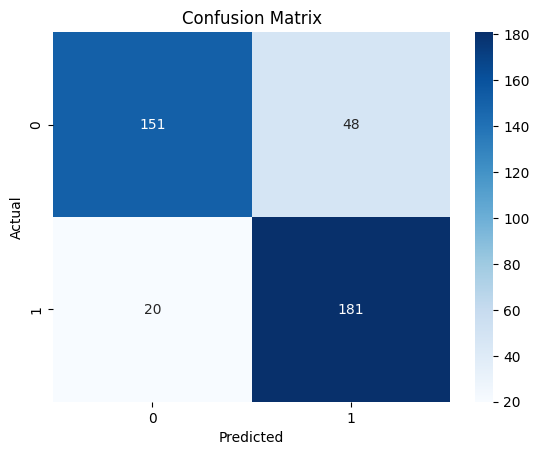

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=2000, image_size=(128, 128)):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale, resizes them, and processes in batches.
    """
    from PIL import Image
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = data['image'].convert('L').resize(image_size)  # Convert to grayscale & resize
        images.append(np.array(img, dtype=np.float32).flatten())  # Flatten the image
        labels.append(1 if data['label'] != 'Healthy' else 0)  # Convert labels to 0 and 1
    return np.array(images, dtype=np.float32), np.array(labels)

# Load and preprocess dataset
num_samples = 2000  # Increased dataset size
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized PCA using SVD
def pca_svd(X, num_components):
    """
    Perform Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to avoid memory issues.
    """
    # Step 1: Compute the mean and center the data
    mean_X = np.mean(X, axis=0, dtype=np.float32)
    X_centered = X - mean_X

    # Step 2: Compute SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Select top principal components
    selected_components = Vt[:num_components]

    # Step 4: Transform data to lower-dimensional space
    X_reduced = np.dot(X_centered, selected_components.T)

    return X_reduced, S

# Reduce to 50 principal components
num_components = 50
X_train_pca, explained_variance_train = pca_svd(X_train, num_components)
X_test_pca, explained_variance_test = pca_svd(X_test, num_components)

print(f"Reduced dataset shape: {X_train_pca.shape}")

# Plot variance explained
explained_variance_ratio = explained_variance_train[:num_components] / np.sum(explained_variance_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by Principal Components")
plt.show()

# Implementing Logistic Regression from Scratch with L2 Regularization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, epochs=1000, lambda_reg=0.1):
    """Train a logistic regression model from scratch with L2 regularization."""
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients with L2 regularization
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (lambda_reg / m) * weights
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias

def predict(X, weights, bias):
    """Make predictions using the trained logistic regression model."""
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Train the logistic regression model
weights, bias = train_logistic_regression(X_train_pca, y_train, lr=0.01, epochs=1000, lambda_reg=0.1)

# Predict on training and testing data
y_train_pred = predict(X_train_pca, weights, bias)
y_test_pred = predict(X_test_pca, weights, bias)

# Evaluate performance
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = np.zeros((2, 2), dtype=int)
for true, pred in zip(y_test, y_test_pred):
    conf_matrix[int(true)][int(pred)] += 1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# prompt: install gradio

!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
import gradio as gr
from PIL import Image

# Load Dataset in Streaming Mode
dataset = load_dataset('Rami/Diabetic_Retinopathy_Preprocessed_Dataset_256x256', split='train', streaming=True)

def preprocess_dataset(dataset, num_samples=2000, image_size=(128, 128)):
    """
    Loads a limited number of images and their labels from the dataset.
    Converts images to grayscale, resizes them, and processes in batches.
    """
    images, labels = [], []
    for i, data in enumerate(dataset):
        if i >= num_samples:
            break
        img = data['image'].convert('L').resize(image_size)  # Convert to grayscale & resize
        images.append(np.array(img, dtype=np.float32).flatten())  # Flatten the image
        labels.append(1 if data['label'] != 'Healthy' else 0)  # Convert labels to 0 and 1
    return np.array(images, dtype=np.float32), np.array(labels)

# Load and preprocess dataset
num_samples = 2000  # Increased dataset size
X, y = preprocess_dataset(dataset, num_samples)

# Normalize dataset
X = X / 255.0  # Scale pixel values between 0 and 1

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features each.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized PCA using SVD
def pca_svd(X, num_components):
    """
    Perform Principal Component Analysis (PCA) using Singular Value Decomposition (SVD) to avoid memory issues.
    """
    mean_X = np.mean(X, axis=0, dtype=np.float32)
    X_centered = X - mean_X
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    selected_components = Vt[:num_components]
    X_reduced = np.dot(X_centered, selected_components.T)
    return X_reduced, S, mean_X, selected_components

# Reduce to 50 principal components
num_components = 50
X_train_pca, explained_variance_train, mean_X, pca_components = pca_svd(X_train, num_components)
X_test_pca, explained_variance_test, _, _ = pca_svd(X_test, num_components)

print(f"Reduced dataset shape: {X_train_pca.shape}")

# Implementing Logistic Regression from Scratch with L2 Regularization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, epochs=1000, lambda_reg=0.1):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) + (lambda_reg / m) * weights
        db = (1 / m) * np.sum(y_pred - y)
        weights -= lr * dw
        bias -= lr * db
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Train the logistic regression model
weights, bias = train_logistic_regression(X_train_pca, y_train, lr=0.01, epochs=1000, lambda_reg=0.1)

def classify_image(img):
    img = img.convert('L').resize((128, 128))
    img_array = np.array(img, dtype=np.float32).flatten() / 255.0  # Normalize
    img_pca = np.dot(img_array - mean_X, pca_components.T)  # Apply PCA transformation
    prediction = predict([img_pca], weights, bias)[0]
    return "Diabetic Retinopathy" if prediction == 1 else "Healthy"

# Gradio Interface
demo = gr.Interface(fn=classify_image, inputs=gr.Image(type="pil"), outputs="text", title="Diabetic Retinopathy Detection", description="Upload an image to classify it as Healthy or Diabetic Retinopathy.")

demo.launch()


Loaded 2000 samples with 16384 features each.
Reduced dataset shape: (1600, 50)
Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3677
Epoch 200: Loss = 0.3182
Epoch 300: Loss = 0.2943
Epoch 400: Loss = 0.2796
Epoch 500: Loss = 0.2695
Epoch 600: Loss = 0.2619
Epoch 700: Loss = 0.2561
Epoch 800: Loss = 0.2513
Epoch 900: Loss = 0.2473
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://48d5beef6d21820484.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
